## SAME GOAL AS arc_clusters.ipynb, BUT WITH AGILE PROJECT PLANNING AND FOCUSING ON SAME-TIME CO-ARCS ONLY

In [9]:
# IMPORTS
import pandas as pd
import numpy as np
import re
from collections import defaultdict
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import time
import os
import glob

In [10]:
%pwd

'/Users/westondcrewe/Desktop/Multibeam'

In [11]:
# READ-IN CLEAN ARC DATAFRAME
filename = 'data/tidy/all_arc_count_data'
arc_count_df = pd.read_csv(filename, parse_dates=['Time']).fillna(0)
print(f"{filename} : file read into a pandas dataframe.")
arc_count_df

data/tidy/all_arc_count_data : file read into a pandas dataframe.


,Time,B2 Beam Blanker,B2 Bias,B2 Extractor,B2 Filament,B2 Gun Lens,B2 Main Lens,B2 Suppressor,B3 Beam Blanker,B3 Bias,...,D3 Gun Lens,D3 Main Lens,D3 Suppressor,D4 Beam Blanker,D4 Bias,D4 Extractor,D4 Filament,D4 Gun Lens,D4 Main Lens,D4 Suppressor
0,2024-06-14 01:55:12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-06-14 01:55:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-06-14 01:55:14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-06-14 01:55:15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-06-14 01:55:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060403,2024-06-27 23:59:54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1060404,2024-06-27 23:59:55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1060405,2024-06-27 23:59:56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1060406,2024-06-27 23:59:57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
arc_counts = arc_count_df.to_numpy()
arc_counts

array([[Timestamp('2024-06-14 01:55:12'), 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [Timestamp('2024-06-14 01:55:13'), 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [Timestamp('2024-06-14 01:55:14'), 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [Timestamp('2024-06-27 23:59:56'), 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [Timestamp('2024-06-27 23:59:57'), 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [Timestamp('2024-06-27 23:59:58'), 0.0, 0.0, ..., 0.0, 0.0, 0.0]],
      dtype=object)

In [13]:
def get_arc_times(col_idx):
    '''Given a column HVSP, find Time values of all arc events
        Argument
        col_idx:   type=int            index of the column HVSP of measure within arc_counts
        Return
        arc_times_df: type=np.array    numpy array arc_counts filtered to keep just arc events of column HVSP of measure
    '''
    arc_times = arc_counts[arc_counts[:, col_idx] > 0]
    return arc_times

In [14]:
# TEST get_arc_times 
print(len(get_arc_times(35)[:, 35]))
print(get_arc_times(35)[:, 35].sum())
## using Pandas DataFrame: 0.09875893592834473s
## using Numpy array with col_idx passed as arg: 0.042749881744384766s
## using Numpy array with col_idx calculated: 0.2038097381591797s
## Speed difference between the two are seen at larger input levels than this computation

6542
6542.0


In [19]:
def synchronous_arcs(col_hvsp, col_idx, col_hvsp_list, col_hvsp_arcs):
    '''function to find the number of arcs a column HVPS component has at the same time as the given col_hvsp
        Arguments
        col_hvsp:  type=string  the given column HVSP component for which we are measuring other column HVSP arcs against
        col_hvsp_list:  type=list of strings  the other columns in the system for which we are measuring arc counts
        Return
        arcs_same_time_list:  type=list  list of integers holding the arc counts for every other column HVSP that occur at the same time as arcs for col_hvsp input
    '''
    counts_list = []
    percentages_list = []                                                           # of all of col_hvsp's arc, what percent coincide with other_col_hvsp arcs
    col_hvsp_arc_count = len(col_hvsp_arcs)
    if col_hvsp_arc_count == 0:
        list_size = len(col_hvsp_list) - 1
        print(list_size)
        counts_list = np.full(list_size, 0)
        percentages_list = np.full(list_size, np.nan)
        return counts_list, percentages_list
    print(f"{col_hvsp_arc_count=}")
    for other_col_hvsp in col_hvsp_list:    
        other_idx = list(arc_count_df.columns).index(other_col_hvsp)
        if other_col_hvsp == col_hvsp:
            continue
        co_arcs = col_hvsp_arcs[col_hvsp_arcs[:, other_idx] > 0]
        count = co_arcs[:, other_idx].sum()
        if co_arcs.size != 0:
            print(f"{other_col_hvsp=}")
            print(" "*3, co_arcs[:, [0, col_idx, other_idx]])
            print(f"    {count=}\n")
        counts_list.append(count)
        percentages_list.append(100*count/col_hvsp_arc_count)
    return counts_list, percentages_list

In [ ]:
# MAIN LOOP (63 Small DataFrames, 7[Col]x9[HVPS] Plots)
start_time = time.time()

col_hvps_list = list(arc_count_df.columns[1:])                                      # list of all Column HVPS to be looped through
times = arc_counts[:, 0]                                                            # get all Time values
for col_idx, col_hvps in enumerate(col_hvps_list):
    # TERMINAL OUTPUT READABILITY
    lenght_symbol = (74-len(col_hvps))//2
    print(f"{'+'*lenght_symbol}{col_hvps}{'+'*lenght_symbol}")
    # GET ARC TIMES
    col_hvps_arcs = get_arc_times(col_idx+1)                                        # col_idx from enumerate will be offset by 1 from proper index in arc_counts
    # CO-ARC COUNTS & PERCENTAGES
    counts, percentages = synchronous_arcs(col_hvps, col_idx+1, col_hvps_list, col_hvps_arcs)
    # CAST PERCENTAGES
    percentages = [int(p) for p in np.nan_to_num(percentages)]
    # CREATE DATAFRAME
    df_cols = col_hvps_list[:col_idx] + col_hvps_list[col_idx+1:]
    col = [k[:2] for k in df_cols]
    hvps = [k[3:] for k in df_cols]
    iter_arc_cluster = pd.DataFrame({"Column": col, "HVPS": hvps, "Synchronous Arc Count": counts, "Synchronous Arc Percentage": percentages})
    #iter_arc_cluster[['Column', 'HVPS']] = iter_arc_cluster['column_HVSP'].str.split(' ', expand=True)
    #iter_arc_cluster.drop('Full Name', axis=1, inplace=True)
    if sum(counts) > 0:
        print(iter_arc_cluster)
        # VISUALIZE COUNTS
        ## initialize plots
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))
        ## data transformation for separate graphs of # & %
        count_plot_data = iter_arc_cluster[["Column", "HVPS", "Synchronous Arc Count"]]
        percentage_plot_data = iter_arc_cluster[["Column", "HVPS", "Synchronous Arc Percentage"]]
        pivot_count = count_plot_data.pivot(index='Column', columns='HVPS', values='Synchronous Arc Count')
        pivot_percentage = percentage_plot_data.pivot(index='Column', columns='HVPS', values='Synchronous Arc Percentage')
        ## construct count plot
        sns.heatmap(pivot_count, annot=True, cmap="YlGnBu", fmt="g", ax = axes[0])
        axes[0].set_title(f'Heatmap of Synchronous {col_hvps} Arc Count')
        ## construct percentage plot
        sns.heatmap(pivot_percentage, annot=True, cmap="YlGnBu", fmt="g", ax = axes[1])
        axes[1].set_title(f'Heatmap of Synchronous {col_hvps} Arc Percentage')
        ## save figure
        title = f"{col_hvps} Same Time Arc Clusters"
        count_filename = f"{title}.pdf".replace(" ", "_")
        plt.savefig(f"plots/arc_clusters/{count_filename}", format='pdf')
        
end_time = time.time()
elapsed_time = end_time-start_time
print(f"{elapsed_time=}")
# Baseline : elapsed_time=79.08619809150696s
# Current  : elapsed_time=0.7268242835998535s
# Final with processing and visualizaitons for # and %: 11.0s

In [ ]:
def synchronous_arcs_large_df(col_hvsp, col_idx, col_hvsp_list, col_hvsp_arcs):
    '''function to find the number of arcs a column HVPS component has at the same time as the given col_hvsp
        Arguments
        col_hvsp:  type=string  the given column HVSP component for which we are measuring other column HVSP arcs against
        col_hvsp_list:  type=list of strings  the other columns in the system for which we are measuring arc counts
        Return
        arcs_same_time_list:  type=list  list of integers holding the arc counts for every other column HVSP that occur at the same time as arcs for col_hvsp input
    '''
    counts_list = []
    percentages_list = []                                                           # of all of col_hvsp's arc, what percent coincide with other_col_hvsp arcs
    col_hvsp_arc_count = len(col_hvsp_arcs)
    if col_hvsp_arc_count == 0:
        counts_list = np.full(63, 0)
        percentages_list = np.full(63, np.nan)
        return counts_list, percentages_list
    print(f"{col_hvsp_arc_count=}")
    for other_col_hvsp in col_hvsp_list:    
        other_idx = list(arc_count_df.columns).index(other_col_hvsp)
        if other_col_hvsp == col_hvsp:
            counts_list.append(0)
            percentages_list.append(0)
            continue
        co_arcs = col_hvsp_arcs[col_hvsp_arcs[:, other_idx] > 0]
        count = co_arcs[:, other_idx].sum()
        if co_arcs.size != 0:
            print(f"{other_col_hvsp=}")
            print(" "*3, co_arcs[:, [0, col_idx, other_idx]])
            print(f"    {count=}\n")
        counts_list.append(count)
        percentages_list.append(100*count/col_hvsp_arc_count)
    
    return counts_list, percentages_list

In [ ]:
# MAIN LOOP (1 Large DataFrame, 63x63 Plot)
start_time = time.time()
col_hvps_list = list(arc_count_df.columns[1:])                                      # list of all Column HVPS to be looped through
times = arc_counts[:, 0]                                                            # get all Time values
arc_cluster_arr = []
for col_idx, col_hvps in enumerate(col_hvps_list):
    # TERMINAL OUTPUT READABILITY
    lenght_symbol = (74-len(col_hvps))//2
    print(f"{'+'*lenght_symbol}{col_hvps}{'+'*lenght_symbol}")
    # GET ARC TIMES
    col_hvps_arcs = get_arc_times(col_idx+1)                                        # col_idx from enumerate will be offset by 1 from proper index in arc_counts
    # CO-ARC COUNTS & PERCENTAGES
    counts, percentages = synchronous_arcs_large_df(col_hvps, col_idx+1, col_hvps_list, col_hvps_arcs)
    print(f"{counts=}")
    # CAST PERCENTAGES
    percentages = [int(p) for p in np.nan_to_num(percentages)]
    # CREATE DATAFRAME
    arc_cluster_arr.append(counts)
arc_cluster_df = pd.DataFrame(arc_cluster_arr, columns=col_hvps_list)
arc_cluster_df.insert(0, "Column HVPS", col_hvps_list)
arc_cluster_df = arc_cluster_df.set_index("Column HVPS")
end_time = time.time()
elapsed_time = end_time-start_time
print(f"{elapsed_time=}")
arc_cluster_df
# 0.9s accrue data as List of Lists, then convert to pd dataframe
# 1.3s build dataframe row by row

+++++++++++++++++++++++++++++B2 Beam Blanker+++++++++++++++++++++++++++++
counts=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
+++++++++++++++++++++++++++++++++B2 Bias+++++++++++++++++++++++++++++++++
col_hvsp_arc_count=2
other_col_hvsp='B2 Extractor'
    [[Timestamp('2024-06-26 13:56:55') 1.0 1.0]]
    count=1.0

other_col_hvsp='B4 Bias'
    [[Timestamp('2024-06-27 17:42:32') 1.0 1.0]]
    count=1.0

counts=[0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
+++++++++++++++++++++++++++++++B2 Extractor+++++++++++++++++++++++++++++++
col_hvsp_arc_count=21
other_col_hvsp='B2 Bias'
    [[Timestamp('2024-06-26 13:56:55') 1.0 1.0]]
    count=1.0

other_col_hvsp='B2 Gun Lens'
    [[Timestam

,B2 Beam Blanker,B2 Bias,B2 Extractor,B2 Filament,B2 Gun Lens,B2 Main Lens,B2 Suppressor,B3 Beam Blanker,B3 Bias,B3 Extractor,...,D3 Gun Lens,D3 Main Lens,D3 Suppressor,D4 Beam Blanker,D4 Bias,D4 Extractor,D4 Filament,D4 Gun Lens,D4 Main Lens,D4 Suppressor
Column HVPS,,,,,,,,,,,,,,,,,,,,,
B2 Beam Blanker,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,...,0,0,0,0,0.0,0.0,0,0.0,0,0.0
B2 Bias,0,0.0,1.0,0,0.0,0,0.0,0,0.0,0.0,...,0,0,0,0,0.0,0.0,0,0.0,0,0.0
B2 Extractor,0,1.0,0.0,0,4.0,0,13.0,0,1.0,2.0,...,0,0,0,0,0.0,0.0,0,0.0,0,0.0
B2 Filament,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,...,0,0,0,0,0.0,0.0,0,0.0,0,0.0
B2 Gun Lens,0,0.0,4.0,0,0.0,0,2.0,0,1.0,1.0,...,0,0,0,0,0.0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4 Extractor,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,...,0,0,0,0,1.0,0.0,0,0.0,0,2.0
D4 Filament,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,...,0,0,0,0,0.0,0.0,0,0.0,0,0.0
D4 Gun Lens,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,...,0,0,0,0,2.0,0.0,0,0.0,0,0.0


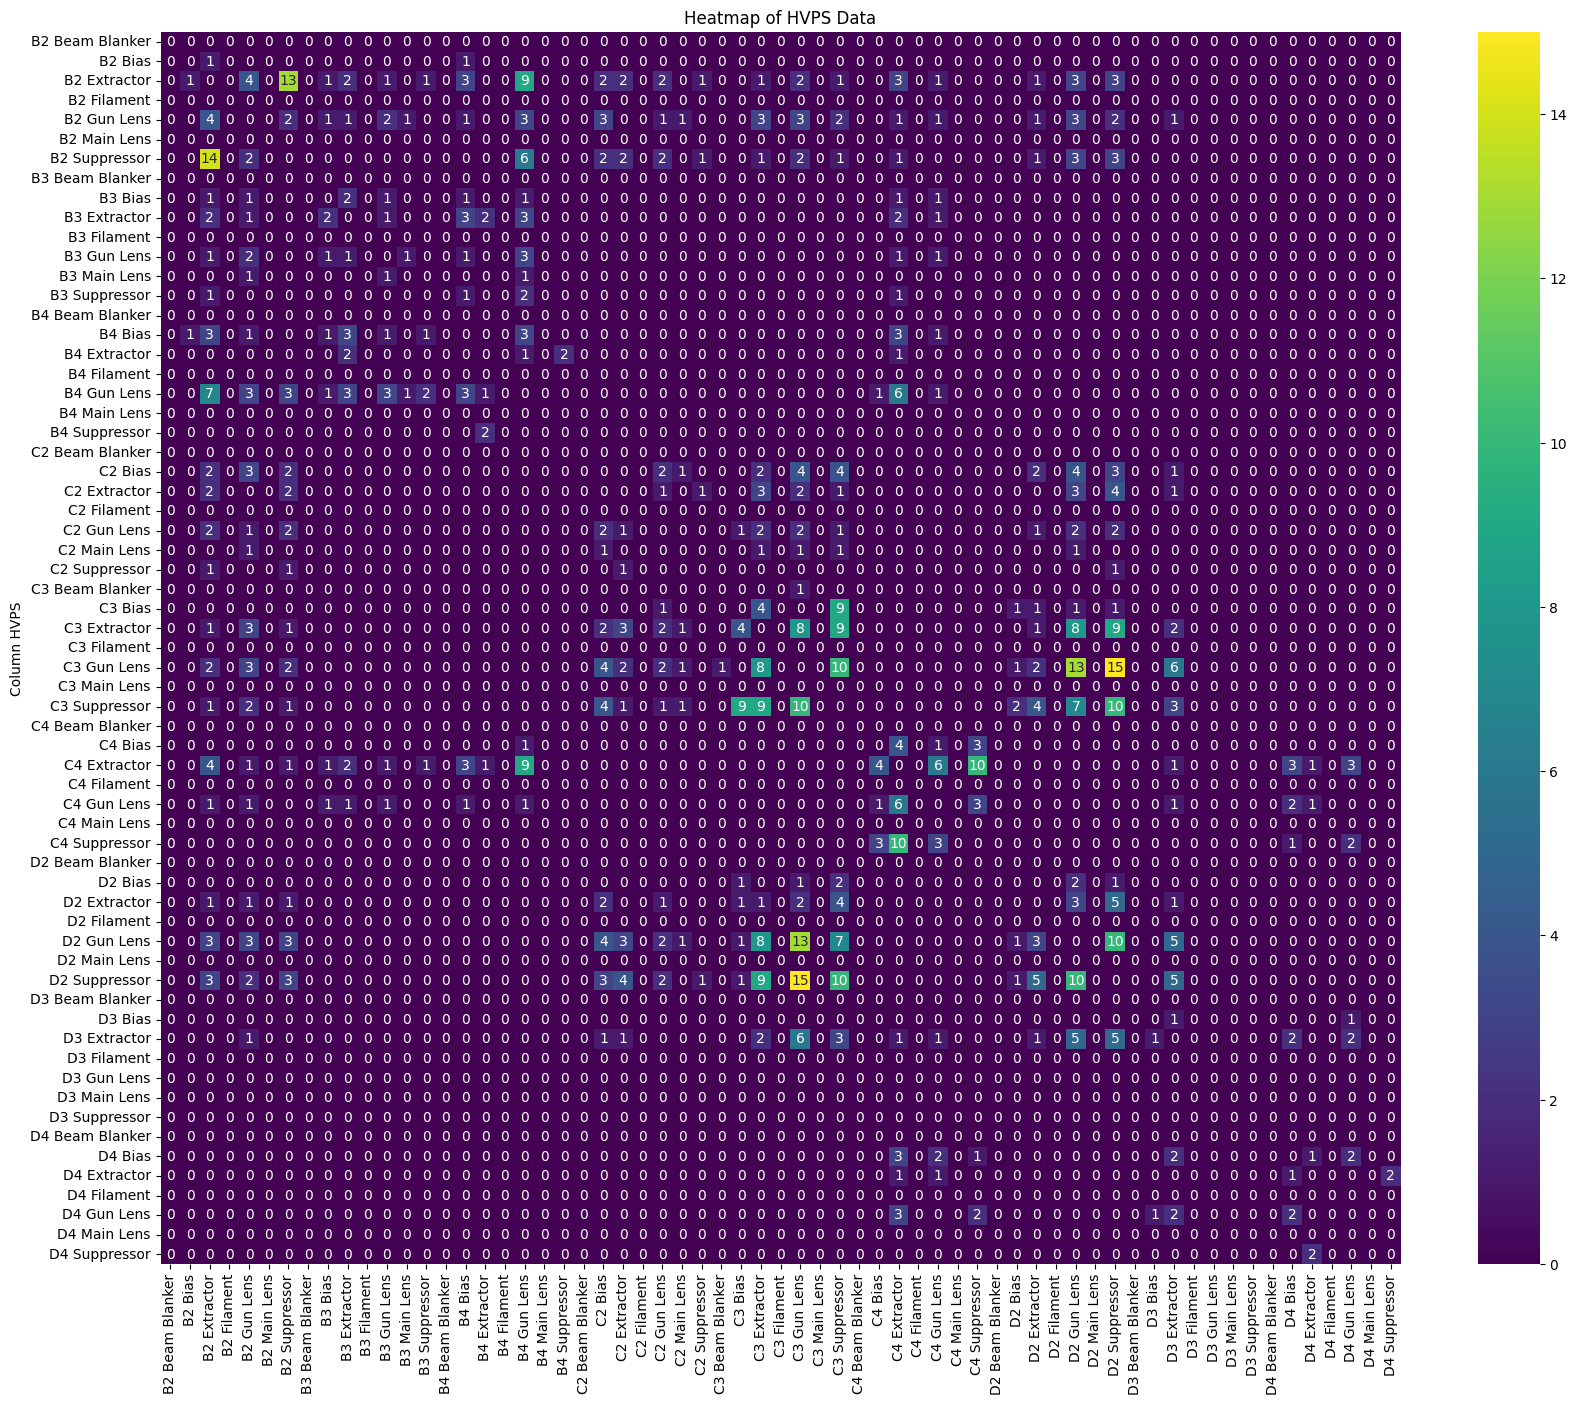

In [ ]:
# 63 x 63
plt.figure(figsize=(20, 16))
sns.heatmap(arc_cluster_df, annot=True, cmap='viridis')
plt.title('Heatmap of HVPS Data')
plt.show()

                 B2 Bias  B2 Extractor  B2 Gun Lens  B2 Suppressor  B3 Bias  \
Column HVPS                                                                   
B2 Bias              0.0           1.0          0.0            0.0      0.0   
B2 Extractor         1.0           0.0          4.0           13.0      1.0   
B2 Gun Lens          0.0           4.0          0.0            2.0      1.0   
B2 Suppressor        0.0          14.0          2.0            0.0      0.0   
B3 Bias              0.0           1.0          1.0            0.0      0.0   
B3 Extractor         0.0           2.0          1.0            0.0      2.0   
B3 Gun Lens          0.0           1.0          2.0            0.0      1.0   
B3 Main Lens         0.0           0.0          1.0            0.0      0.0   
B3 Suppressor        0.0           1.0          0.0            0.0      0.0   
B4 Bias              1.0           3.0          1.0            0.0      1.0   
B4 Extractor         0.0           0.0          0.0 

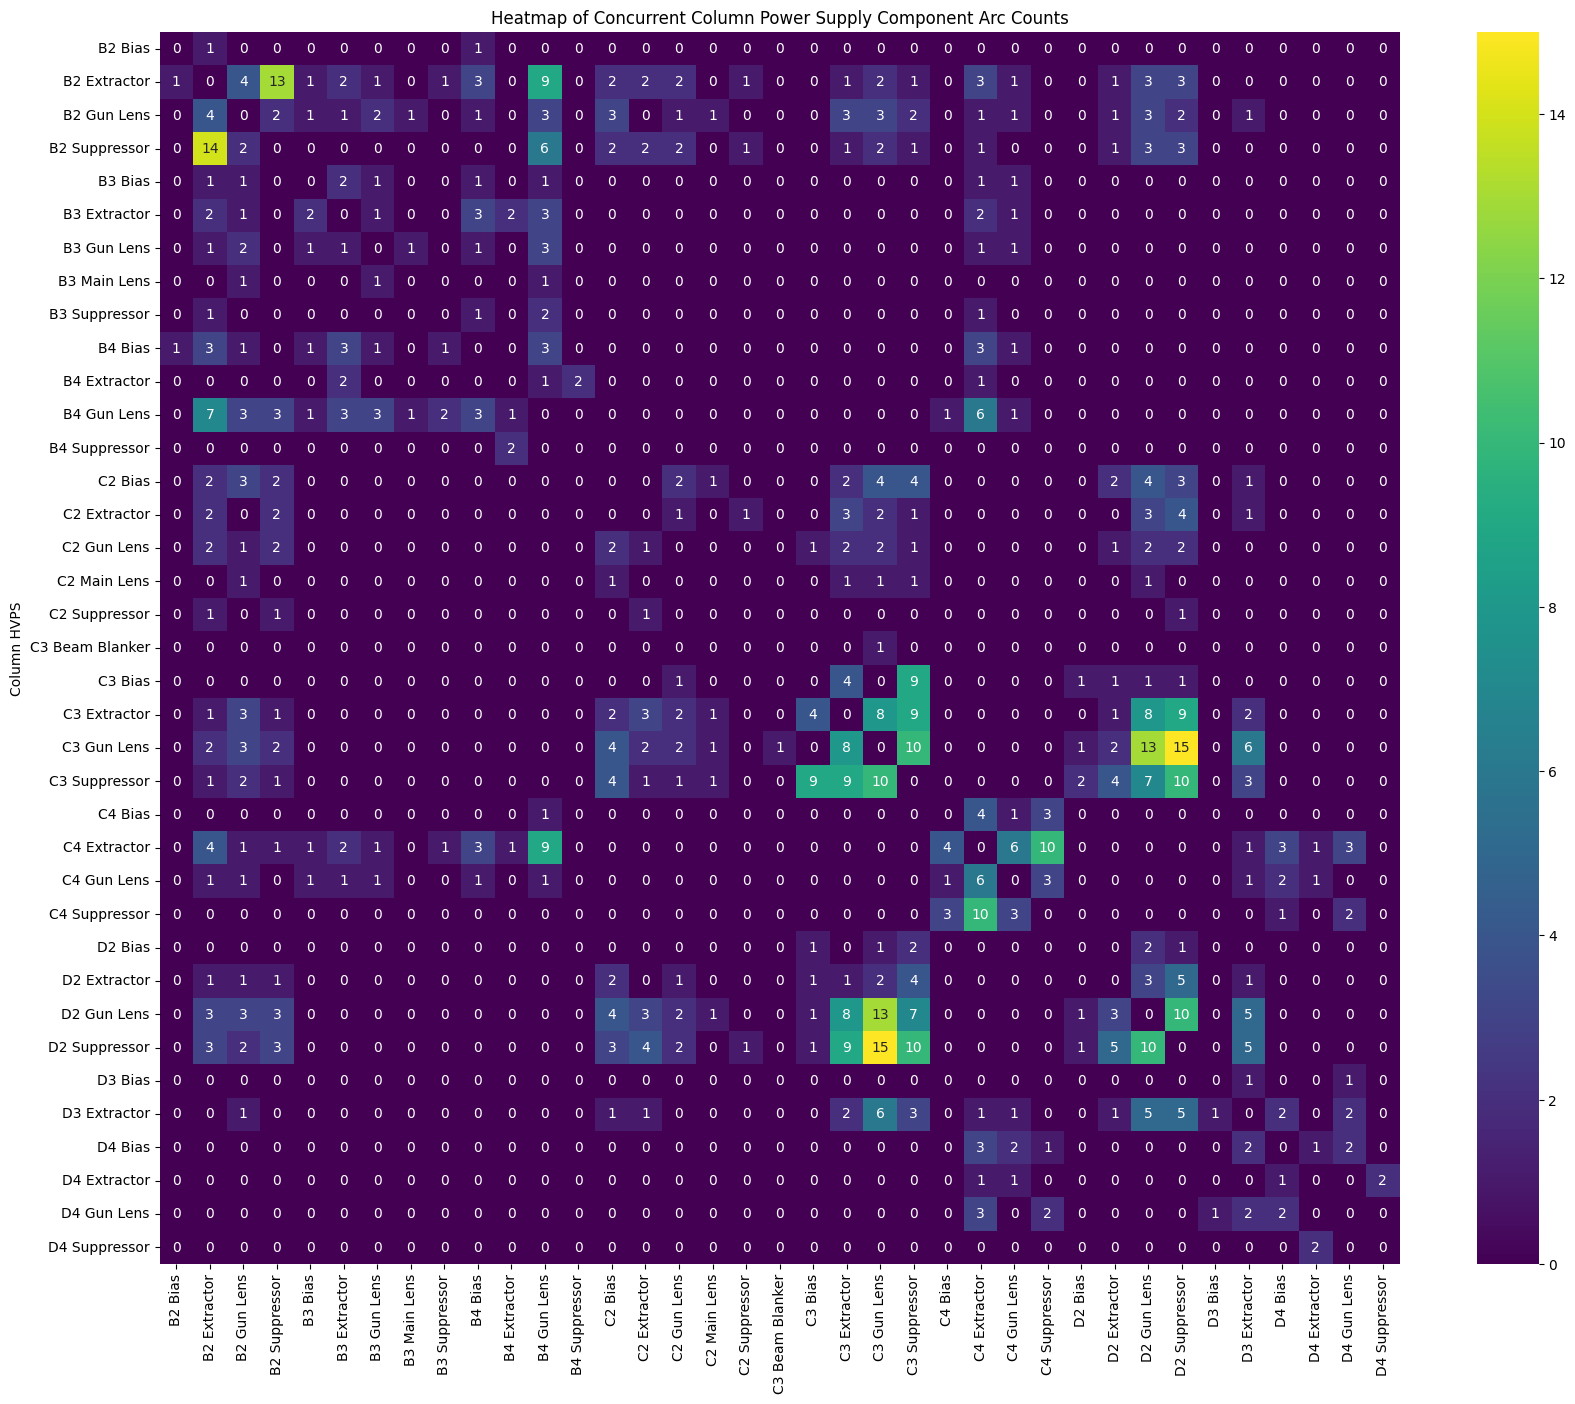

In [ ]:
# 37x37
arc_cluster_df_condensed = arc_cluster_df.loc[(arc_cluster_df!=0).any(axis=1)]
arc_cluster_df_condensed = arc_cluster_df_condensed.loc[:, (arc_cluster_df_condensed != 0).any(axis=0)]
print(arc_cluster_df_condensed)
plt.figure(figsize=(20, 16))
sns.heatmap(arc_cluster_df_condensed, annot=True, cmap='viridis')
plt.title('Heatmap of Concurrent Column Power Supply Component Arc Counts')
plt.savefig(f"plots/arc_clusters/All_Component_Concurrent_Arc_Counts.pdf", format = 'pdf')
plt.show()